In [743]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
%matplotlib inline  

import os

import seaborn as sns
from scipy import stats, optimize

import statsmodels.api as sm

In [744]:
#os.chdir("Tutorial 1")

files = os.listdir()
files

['.ipynb_checkpoints',
 'Circuit data.csv',
 'Monday data.csv',
 'Residuals and Goodness of Fit.ipynb',
 'Untitled.ipynb']

In [745]:
test_file = files[1]
test_file

'Circuit data.csv'

In [746]:
test_table = pd.read_csv(test_file)

In [747]:
test_table

,Current (mA),Voltage (mV),Calculated Resistance (Ohms),Uncertainty (+/- 20% mV)
0,58.2,12900.0,221.65,2580.0
1,77.5,20019.0,258.31,4003.8
2,36.1,7373.0,204.24,1474.6
3,87.5,22439.0,256.45,4487.8
4,52.4,12522.0,238.97,2504.4
5,11.4,2605.0,228.51,521.0
6,89.1,25947.0,291.21,5189.4
7,8.0,1680.0,210.00,336.0
8,4.5,873.0,194.00,174.6
9,47.5,11400.0,240.00,2280.0


In [748]:
columns = test_table.columns
columns

Index(['Current (mA)', 'Voltage (mV)', 'Calculated Resistance (Ohms)',
       'Uncertainty (+/- 20% mV)'],
      dtype='object')

In [758]:
x = test_table[columns[0]].values
y = test_table[columns[1]].values

uncertainty = test_table[columns[3]].values

## Fitting Linear Models

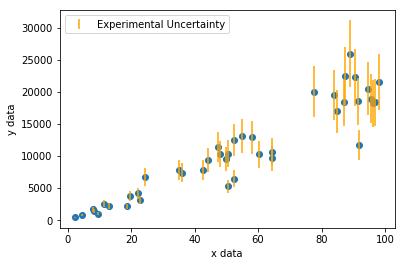

In [759]:
plt.scatter(x,y)
plt.errorbar(x,y,yerr=uncertainty,fmt='none',label='Experimental Uncertainty',color='orange')

plt.xlabel('x data')
plt.ylabel('y data')
plt.legend(loc=2)

# 1) General Approach: Curvefit with specified model (SciPy)

In [760]:
def linear(x,m,b):
    return m*x + b

In [761]:
params, cov = optimize.curve_fit(linear,xdata=x,ydata=y)

error_on_params = np.sqrt(np.diagonal(cov))

params, error_on_params

(array([ 216.61817733, -658.17956687]), array([ 12.7020236, 784.4989699]))

# 2) Using stats' linear regression (SciPy)

In [762]:
stats.linregress(x,y)

LinregressResult(slope=216.61817585904015, intercept=-658.179508508154, rvalue=0.9375996859019955, pvalue=5.939964639280726e-20, stderr=12.702022012919148)

In [763]:
fitted.params,np.sqrt(np.diagonal(fitted.cov_params()))

(array([14.42579372,  2.01885345]), array([3.25087087, 0.05425467]))

# 3) Using ordinary least squares with summary (Statsmodels)

In [764]:
x_fit = sm.add_constant(x)

fitted = sm.OLS(y,x_fit).fit()

In [765]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     290.8
Date:                Fri, 03 Aug 2018   Prob (F-statistic):           5.94e-20
Time:                        15:01:32   Log-Likelihood:                -388.04
No. Observations:                  42   AIC:                             780.1
Df Residuals:                      40   BIC:                             783.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -658.1795    784.499     -0.839      0.4

## How to incorporate weights

In [766]:
weight = 1/uncertainty**2
weighted_fit = sm.WLS(y, x_fit, weights=weight).fit()

In [767]:
print(weighted_fit.params)
print()
print(np.sqrt(np.diagonal(weighted_fit.cov_params())))

[-32.98083995 174.46599787]

[110.01289683   9.1583926 ]


In [768]:
print(weighted_fit.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            WLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     362.9
Date:                Fri, 03 Aug 2018   Prob (F-statistic):           1.14e-21
Time:                        15:01:38   Log-Likelihood:                -379.71
No. Observations:                  42   AIC:                             763.4
Df Residuals:                      40   BIC:                             766.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.9808    110.013     -0.300      0.7

More at https://www.statsmodels.org/dev/examples/notebooks/generated/wls.html

compare R^2 for each, X^2 for each

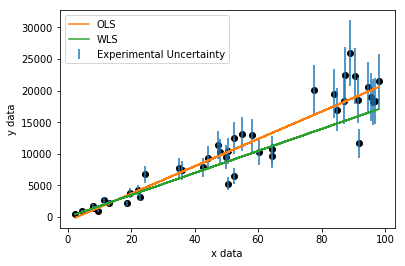

In [769]:
plt.scatter(x,y,color='black')
plt.errorbar(x,y,yerr=uncertainty,fmt='none',label='Experimental Uncertainty')

plt.plot(x,linear(x,fitted.params[1],fitted.params[0]),label='OLS')
plt.plot(x,linear(x,weighted_fit.params[1],weighted_fit.params[0]),label='WLS')


plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()

## Reduced Chi Square Goodness of Fit

In [770]:
def reducedChiSquare(observedVector, fittedVector, uncertaintyVector,numberOfParams):
    
    residuals = observedVector - fittedVector
    weightedResiduals = (residuals/uncertaintyVector)**2
    
    DoF = len(observedVector) - numberOfParams
    
    chiSq = np.sum(weightedResiduals)
    
    return chiSq/DoF

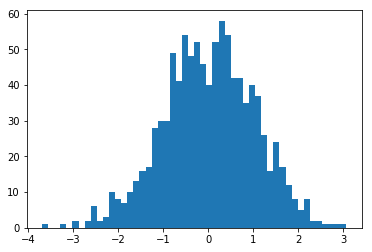

In [771]:
numBins = 50

z = stats.norm.rvs(0,1,1000)
counts, bins, hist = plt.hist(z,bins=numBins)

halfWidths = 0.5*(bins[1] - bins[0])
centers = bins[:-1] + halfWidths

# Fitting a non-linear function

In [772]:
def gaussian(x,a,mu,sigma):
    return a*np.exp(-.5*(x-mu)**2 / (sigma ** 2) )

Our Gaussian requires an amplitude, center, and spread, which we call a,mu, and sigma. We make guesses about what they are to use our fitting algorithm. 

A reasonable guess for this gaussian is that "a" would be the highest mark, the max amount of counts, the center would be close to the average on the x axis, and the spread would be close to the standard deviation as it normally is. 

Note that these are *guesses* and not exact solutions since this isn't a normalized Gaussian probability density, but a function of the same form.

In [773]:
parameter_guesses = [np.max(counts),np.mean(bins),np.std(bins)]

In [774]:
params, cov = optimize.curve_fit(f=gaussian,xdata=centers,ydata=counts,p0=parameter_guesses)

In [775]:
params

array([5.27226126e+01, 4.01810287e-02, 1.02858090e+00])

The covariance matrix is sigma_i sigma_j where i and j are the ith parameter, for example. The diagonal elements give the square of the uncertainty in your fit parameters. These values aren't guaranteed to be well-behaved since the procedure relies on numerical optimization, so be sure to sanity-check your results.

In [776]:
cov

array([[ 1.81247065e+00, -1.78186272e-05, -2.36120645e-02],
       [-1.78186272e-05,  9.19437503e-04,  7.80105785e-07],
       [-2.36120645e-02,  7.80105785e-07,  9.21569977e-04]])

Thus the uncertainties we need can be extracted by taking the square root of the diagonal entries of the covariance matrix, like this.

In [777]:
uncertaintyArray = np.sqrt(np.diagonal(cov))
uncertaintyArray

array([1.3462803 , 0.03032223, 0.03035737])

In [778]:
lowerParams, upperParams = params - uncertaintyArray, params + uncertaintyArray

Text(0.5,1,'Gaussian fit with error')

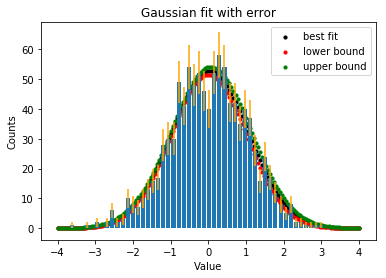

In [779]:
error= np.sqrt(counts)
plt.errorbar(centers,counts,yerr=error,fmt='none',color='orange')
_,_, hist = plt.hist(z,bins=numBins,rwidth=.8)


xVals = np.linspace(-4,4,150)

plt.scatter(xVals, gaussian(xVals,*params), color='black',s=10,label='best fit')

plt.scatter(xVals, gaussian(xVals,*lowerParams), color='r',s=10,label='lower bound')
plt.scatter(xVals, gaussian(xVals,*upperParams), color='g',s=10,label='upper bound')




plt.legend()
plt.ylabel('Counts')
plt.xlabel('Value')

plt.title('Gaussian fit with error')

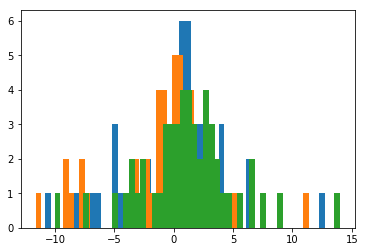

In [780]:
_,_, hist = plt.hist(gaussian(centers,*params)-counts,bins=numBins,stacked=False)

_,_, histlow = plt.hist(gaussian(centers,*lowerParams)-counts,bins=numBins,stacked=False)
_,_, histhigh = plt.hist(gaussian(centers,*upperParams)-counts,bins=numBins,stacked=False)